https://www.youtube.com/watch?v=-GRBKbdgREs <br>
Microprice - measures the tendency that the price moves toward the bid or ask price

# Microprice deviations from mid price by different deviation levels

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 7)

In [14]:
d = pd.read_pickle("data/imbalance.pkl")
d = d[['ts','askp','askv','bidp','bidv','mid']]
d['micro'] = d.askp * d.bidv / (d.bidv + d.askv) + d.bidp * d.askv / (d.bidv + d.askv)
d['middiffmicro'] = d.mid - d.micro

In [15]:
d.head()

,ts,askp,askv,bidp,bidv,mid,micro,middiffmicro
0,2018-04-17 10:56:24,8099.0,2.469,8094.0,1.19,8096.50,8095.626127,0.873873
1,2018-04-17 10:56:29,8098.9,0.209,8095.0,0.60,8096.95,8097.892460,-0.942460
2,2018-04-17 10:56:35,8099.5,2.469,8095.0,0.60,8097.25,8095.879765,1.370235
3,2018-04-17 10:56:40,8101.6,1.000,8095.1,1.01,8098.35,8098.366169,-0.016169
4,2018-04-17 10:56:46,8101.5,0.234,8095.1,0.01,8098.30,8095.362295,2.937705


In [74]:
temp = d.head(1000)

In [75]:
def plot_deviates(temp, i):
    cutoff = np.nanmean(temp.middiffmicro) + i * np.nanstd(temp.middiffmicro, ddof = 1)
    print("Deviates from mean by: ",i," sd, count:", temp[np.abs(temp.middiffmicro) > cutoff]['ts'].count())
    mark = temp[np.abs(temp.middiffmicro) > cutoff].index
    plt.plot(temp.ts, temp.micro)
    plt.plot(temp.ts[mark], temp.micro[mark], 'o')
    plt.show()

Deviates from mean by:  2  sd, count: 70


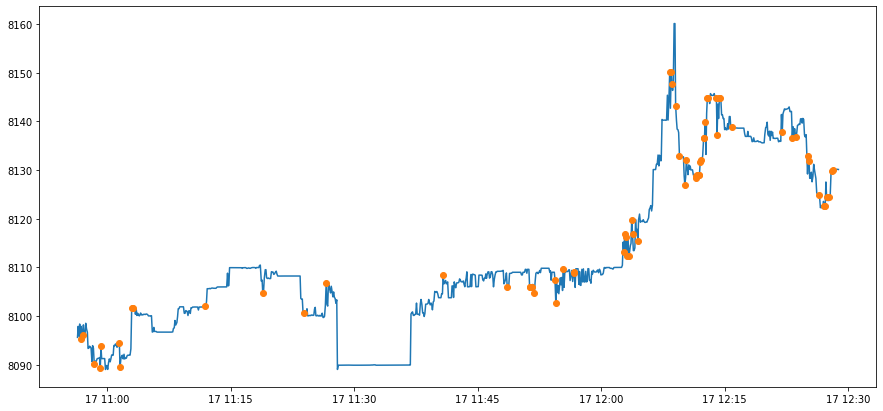

In [76]:
plot_deviates(temp, 2)

Deviates from mean by:  3  sd, count: 14


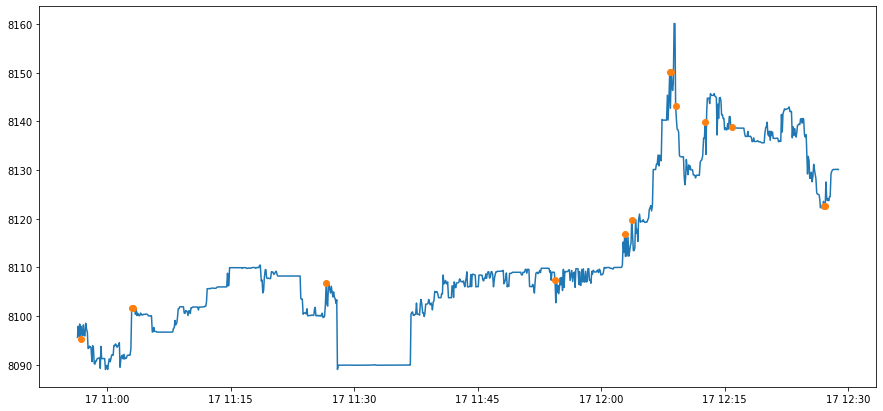

In [77]:
plot_deviates(temp, 3)

Deviates from mean by:  4  sd, count: 4


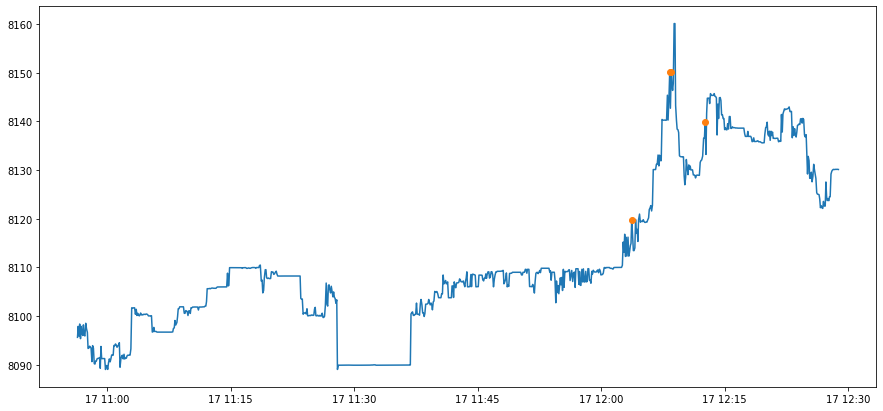

In [78]:
plot_deviates(temp, 4)